In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make numpy printouts easier to read.ArithmeticError
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


## regression

In [4]:
## regression 

In [5]:
raw_dataset = pd.read_csv("../../data/car/audi.csv", 
                          na_values='?', comment='\t', skipinitialspace=True)
orignal_data=raw_dataset.copy()

In [6]:
orignal_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [7]:
orignal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [8]:
orignal_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


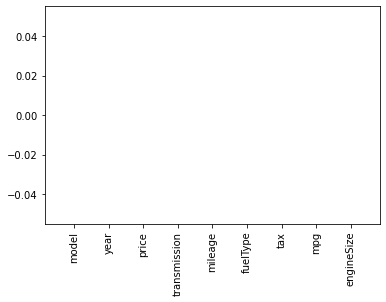

In [9]:
plt.figure()
for i in raw_dataset.columns:
  x=raw_dataset[i].isna().sum()
  plt.bar(i,x)
  plt.xticks(rotation=90)
plt.show()

In [10]:
feature_x=[i  for i in raw_dataset.columns if i!="price"] 


In [11]:
#
# from google.colab import drive
# # drive.mount('/content/drive')
# nb_path = os.path.realpath('datacleaner1')
# # # os.symlink('/content/drive/My Drive/Colab Notebooks/datacleaner1/', nb_path)
# # sys.path.insert(0,nb_path)


# !pip install --target=$nb_path update-checker

In [12]:
import sys,os

In [13]:
import datacleaner
raw_dataset=datacleaner.autoclean(raw_dataset)

In [14]:

X=raw_dataset[feature_x]
y=raw_dataset["price"]

C:\Users\nikhil\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

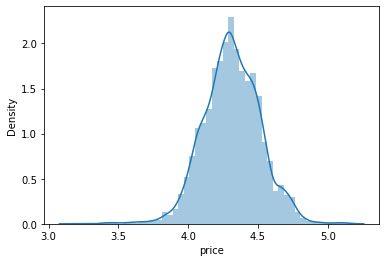

In [15]:
sns.distplot(np.log10(y))

In [16]:
X.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,1,15735,2,150,55.4,1.4
1,5,2016,0,36203,0,20,64.2,2.0
2,0,2016,1,29946,2,30,55.4,1.4
3,3,2017,0,25952,0,145,67.3,2.0
4,2,2019,1,1998,2,145,49.6,1.0


C:\Users\nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nikhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nikhil\ana

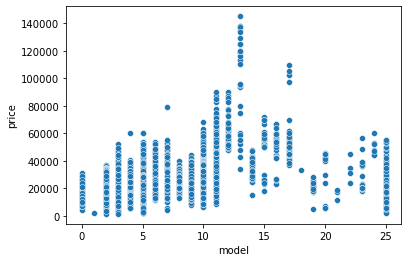

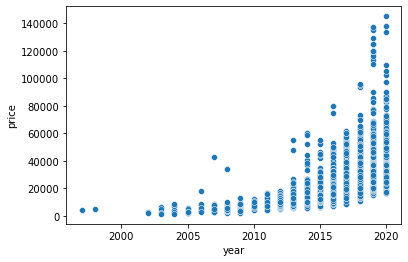

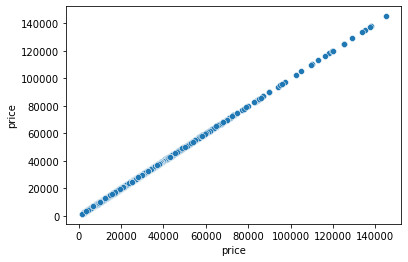

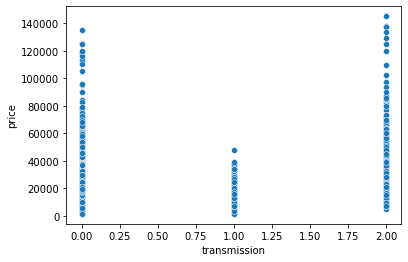

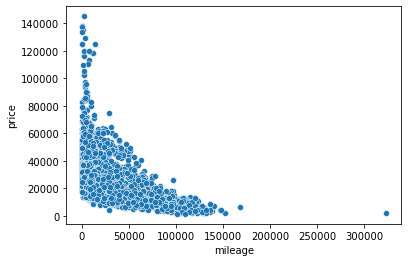

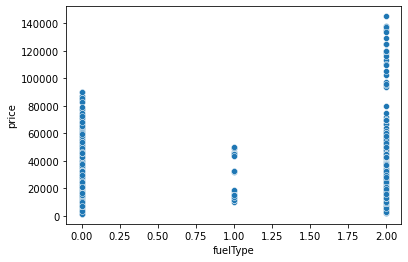

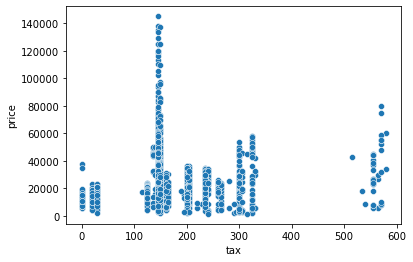

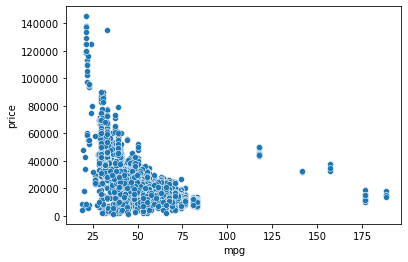

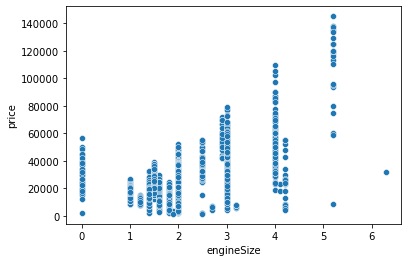

In [17]:
for i in raw_dataset.columns:
  plt.figure()
  sns.scatterplot(raw_dataset[i],raw_dataset["price"])

In [18]:
map_dict = {}
for i in feature_x:
    unique = sorted(raw_dataset[i].unique())
    map_dict[i] = dict(zip(unique, sorted(X[i].unique())))

In [19]:

from sklearn.model_selection import train_test_split

In [20]:

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.33)
print(x_train.shape)
print(x_test.shape)


(7147, 8)
(3521, 8)


In [21]:
nm=preprocessing.Normalization()

In [22]:
nm.adapt((x_train).astype("float32"))

In [23]:
print(nm.mean.numpy())

[    5.776  2017.091     1.081 25020.268     0.935   125.791    50.859
     1.933]


In [24]:


first = np.array(x_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', nm(first).numpy())

First example: [[    0.   2017.      1.  25800.      2.    150.     67.3     1. ]]

Normalized: [[-1.14 -0.04 -0.11  0.03  1.07  0.36  1.24 -1.56]]


In [25]:
model = tf.keras.Sequential([
    nm,
    
    layers.Dense(units=10,activation="relu"),
    layers.Dense(units=10,activation="relu"),
    layers.Dense(units=5,activation="relu",activity_regularizer=keras.regularizers.L1(0.01)),
    layers.Dense(units=1)





])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 8)                 17        
_________________________________________________________________
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 278
Trainable params: 261
Non-trainable params: 17
_________________________________________________________________


In [26]:

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.2),
  
    
  
    loss="mean_absolute_error")

In [27]:
%%time
history = model.fit(
    x_train, y_train,
    batch_size=128,

    epochs=200,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Wall time: 27 s


In [28]:

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
195,2134.307861,2195.229980,195
196,2128.755859,2248.948486,196
197,2178.022705,2165.136475,197
198,2147.996826,2158.187500,198
199,2157.468018,2345.255615,199


In [29]:
def plot_loss(history):
    plt.figure(figsize=(10, 8))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    # plt.ylim([min(history.history["val_loss"])-200, max(history.history["val_loss"])])
    plt.xlabel('Epoch')
    plt.ylabel('Error [price]')
    plt.legend()
    plt.grid(True)

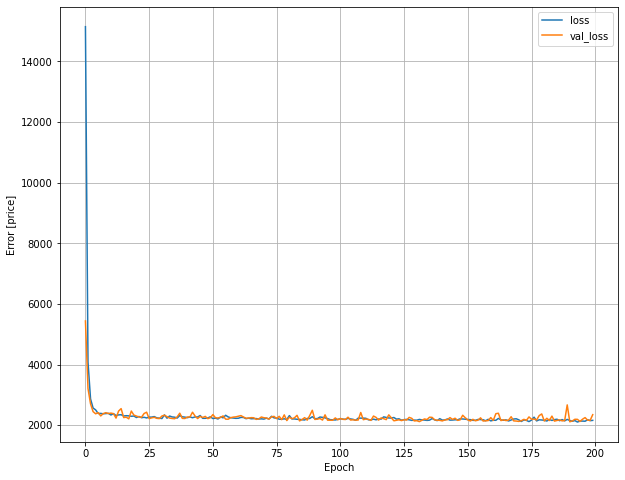

In [30]:
plot_loss(history)

In [31]:











model.evaluate(x_test,y_test)

111/111 [==============================] - 0s 2ms/step - loss: 2351.4380


2351.43798828125

In [32]:

y_pre=model.predict(x_test)

In [33]:
def plot_prediction(x, y):
    plt.scatter(x, y, label='test & pre data')
    lims = [0, max(y)+600]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims, color="red")
    # plt.plot(x, y, color='red', label='Predictions')

    plt.ylabel('y_test')
    plt.xlabel('y_pre')
    plt.legend()
    plt.figure()
    plt.hist(x, color="b", bins=int(2*(len(x))**(1/3)), alpha=0.6)
    plt.hist(y, color="orange", bins=int(2*(len(x))**(1/3)), alpha=0.4)

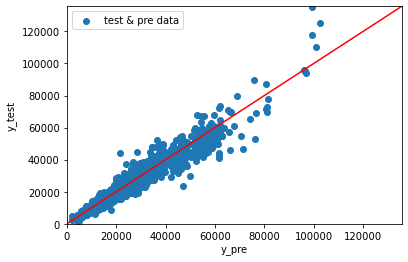

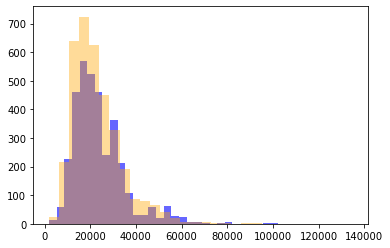

In [34]:
plot_prediction(y_pre,y_test)

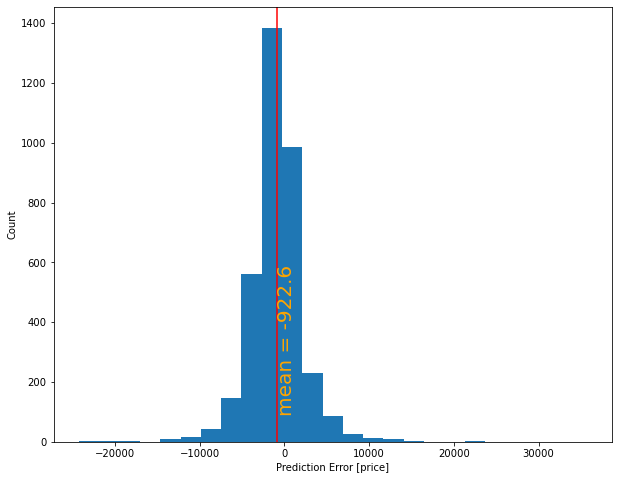

In [35]:

error = y_test - y_pre.flatten()
plt.figure(figsize=(10,8))
plt.hist(error, bins=25)

plt.xlabel('Prediction Error [price]')

plt.axvline(x=round(np.mean(error),1),ymax=1000,color="red")
plt.text(round(np.mean(error),1)+50,100,f'mean = {round(np.mean(error),1)}',rotation=90,color="orange",fontdict=dict(size=20))
_ = plt.ylabel('Count')

In [36]:
# nb_path="/content/drive/MyDrive/Colab Notebooks/library"

In [37]:
sys.path

['C:\\Users\\nikhil\\Documents\\GitHub\\jupyter\\NLP\\notebooks',
 'C:\\Users\\nikhil\\anaconda3\\python38.zip',
 'C:\\Users\\nikhil\\anaconda3\\DLLs',
 'C:\\Users\\nikhil\\anaconda3\\lib',
 'C:\\Users\\nikhil\\anaconda3',
 '',
 'C:\\Users\\nikhil\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\nikhil\\anaconda3\\lib\\site-packages',
 'C:\\Users\\nikhil\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\nikhil\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\nikhil\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\nikhil\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\nikhil\\.ipython']

In [38]:
# sys.path.insert(0, "/content/drive/MyDrive/Colab Notebooks/library") 

In [39]:
# !pip install --target=$nb_path spacy

In [40]:
import tensorflow_addons as tfa
metric = tfa.metrics.r_square.RSquare()

In [41]:
metric.update_state(y_test, y_pre.flatten())

In [42]:
result = metric.result()

In [43]:

result.numpy()

0.9152376

In [44]:
print(y_test[:5],y_pre.flatten()[:5])

2049    14998
5609    21950
7638    28990
1603    25489
5953    30950
Name: price, dtype: int64 [14108.426 28386.86  30463.348 24321.648 31766.838]


In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_score(y_test, y_pre.flatten())

0.9152374824902315

## Hyper parameter

In [47]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp

In [50]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [51]:
def train_test_model(hparams):
    model = tf.keras.Sequential([
        nm,
        
        layers.Dense(hparams[HP_NUM_UNITS],activation="relu"),
        layers.Dropout(hparams[HP_DROPOUT]),
        layers.Dense(hparams[HP_NUM_UNITS],activation="relu"),
      
        layers.Dense(hparams[HP_NUM_UNITS],activity_regularizer=keras.regularizers.L1(0.01)),
        layers.Dense(units=1)





    ])

    model.compile(
        optimizer=hparams[HP_OPTIMIZER],
      
        
      
        loss="mean_absolute_error")
    history = model.fit(
        x_train, y_train,
        batch_size=128,

        epochs=200,
        # suppress logging
        verbose=0,
        # Calculate validation results on 20% of the training data
        validation_split = 0.2)

    return (np.mean(history.history['val_loss'][192:200]),np.mean(history.history['loss'][192:200]))

In [52]:
HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([10, 15,25]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.3))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

In [53]:
mean_absolute_error="mean_abs_error"
t_loss="train_loss"

In [54]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    (mean_abs_error,train_loss) = train_test_model(hparams)
    tf.summary.scalar(mean_absolute_error,mean_abs_error,step=1)
    tf.summary.scalar(t_loss,train_loss,step=1)

In [60]:
from sklearn.metrics import r2_score
session_num = 0
for num_units in HP_NUM_UNITS.domain.values:
    for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
        for optimizer in HP_OPTIMIZER.domain.values:
            hparams = {
                HP_NUM_UNITS: num_units,
                HP_DROPOUT: dropout_rate,
                HP_OPTIMIZER: optimizer,
            }
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            run('Log_Model/regression_log/' + run_name, hparams)
            session_num += 1

--- Starting trial: run-0
{'num_units': 10, 'dropout': 0.1, 'optimizer': 'adam'}
--- Starting trial: run-1
{'num_units': 10, 'dropout': 0.1, 'optimizer': 'sgd'}
--- Starting trial: run-2
{'num_units': 10, 'dropout': 0.3, 'optimizer': 'adam'}
--- Starting trial: run-3
{'num_units': 10, 'dropout': 0.3, 'optimizer': 'sgd'}
--- Starting trial: run-4
{'num_units': 15, 'dropout': 0.1, 'optimizer': 'adam'}
--- Starting trial: run-5
{'num_units': 15, 'dropout': 0.1, 'optimizer': 'sgd'}
--- Starting trial: run-6
{'num_units': 15, 'dropout': 0.3, 'optimizer': 'adam'}
--- Starting trial: run-7
{'num_units': 15, 'dropout': 0.3, 'optimizer': 'sgd'}
--- Starting trial: run-8
{'num_units': 25, 'dropout': 0.1, 'optimizer': 'adam'}
--- Starting trial: run-9
{'num_units': 25, 'dropout': 0.1, 'optimizer': 'sgd'}
--- Starting trial: run-10
{'num_units': 25, 'dropout': 0.3, 'optimizer': 'adam'}
--- Starting trial: run-11
{'num_units': 25, 'dropout': 0.3, 'optimizer': 'sgd'}


In [61]:
%tensorboard --reload_multifile=true --logdir Log_Model/regression_log

Reusing TensorBoard on port 6006 (pid 8436), started 0:09:24 ago. (Use '!kill 8436' to kill it.)